In [1]:
import pandas as pd

df = pd.read_csv('yelp_labelled.txt', names=['Sentences','Label'], sep='\t')
df

,Sentences,Label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [2]:
from sklearn.model_selection import train_test_split

sent = df['Sentences'].values
lab = df['Label'].values

sent_train, sent_test, lab_train, lab_test = train_test_split(sent,lab, test_size=0.2)

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

tokenizer = Tokenizer(num_words=250, oov_token='OOV')

tokenizer.fit_on_texts(sent_train)
tokenizer.fit_on_texts(sent_test)

sent_train_sequence = tokenizer.texts_to_sequences(sent_train)
sent_test_sequence = tokenizer.texts_to_sequences(sent_test)

sent_train_padding = pad_sequences(sent_train_sequence, maxlen=20, padding='post')
sent_test_padding = pad_sequences(sent_test_sequence, maxlen=20, padding='post')

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, GlobalAveragePooling1D

model = Sequential([Embedding(250, 16, input_length=20),
                    GlobalAveragePooling1D(),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

In [5]:
hist = model.fit(sent_train_padding, lab_train, validation_data=(sent_test_padding, lab_test), batch_size=32, epochs=50, verbose=2)

Epoch 1/50
25/25 - 2s - loss: 0.6924 - accuracy: 0.5512 - val_loss: 0.6906 - val_accuracy: 0.5400 - 2s/epoch - 88ms/step
Epoch 2/50
25/25 - 0s - loss: 0.6893 - accuracy: 0.5825 - val_loss: 0.6867 - val_accuracy: 0.6100 - 142ms/epoch - 6ms/step
Epoch 3/50
25/25 - 0s - loss: 0.6843 - accuracy: 0.6100 - val_loss: 0.6816 - val_accuracy: 0.6450 - 158ms/epoch - 6ms/step
Epoch 4/50
25/25 - 0s - loss: 0.6767 - accuracy: 0.6350 - val_loss: 0.6737 - val_accuracy: 0.6900 - 141ms/epoch - 6ms/step
Epoch 5/50
25/25 - 0s - loss: 0.6652 - accuracy: 0.6587 - val_loss: 0.6607 - val_accuracy: 0.7100 - 142ms/epoch - 6ms/step
Epoch 6/50
25/25 - 0s - loss: 0.6461 - accuracy: 0.7050 - val_loss: 0.6431 - val_accuracy: 0.7000 - 157ms/epoch - 6ms/step
Epoch 7/50
25/25 - 0s - loss: 0.6217 - accuracy: 0.7138 - val_loss: 0.6195 - val_accuracy: 0.7250 - 157ms/epoch - 6ms/step
Epoch 8/50
25/25 - 0s - loss: 0.5884 - accuracy: 0.7738 - val_loss: 0.5973 - val_accuracy: 0.7350 - 140ms/epoch - 6ms/step
Epoch 9/50
25/25 -

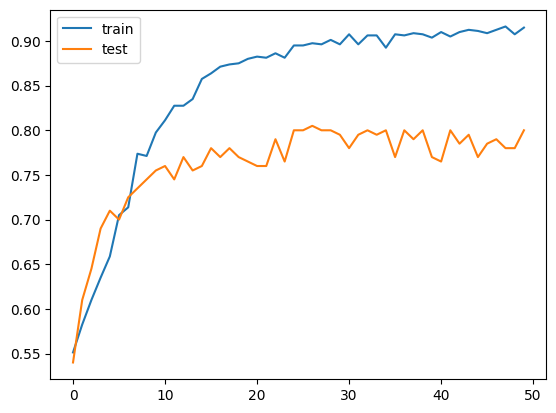

In [6]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.show()

In [7]:
import tensorflow as tf
print(tf.__version__)

2.11.0
